# Домашнее задание 2 - предобработка признаков, pandas


### О задании

Практическое задание 2 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [2]:
def max_element(arr):
    indexes = np.where(arr == 0)[0] # здесь по идее tuple массивов, распаковываем его
    indexes += 1 # np.ones(len(indexes), dtype=np.int8) – тут я перемудрил
    return max(arr[np.int_(indexes)[:-1]])

x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
max_element(x)

5

**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [3]:
def nearest_value(X, v):
    distances = abs(X - v)
    dist_min = distances.min()
    index = np.where(distances == dist_min)
    return X[index][0]
    
X = np.arange(0,10).reshape((2, 5))
v = 3.6
nearest_value(X, v)

4

**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [4]:
def scale(X):
    X -= X.mean(axis=0)
    X /= (X.std(axis=0) + 0.001)
    return X

a = np.random.uniform(0, 10, size=(5,5))
scale(a)

array([[ 1.28524503,  1.37957713, -0.47921027,  1.1714225 ,  0.8253163 ],
       [-1.37611065,  0.66627038, -0.11785893,  1.2413938 ,  1.01626437],
       [-0.92270473,  0.20123295,  1.01058298, -1.10481169, -1.01916778],
       [ 0.71361976, -1.32847309, -1.55638129, -0.59150913, -1.38746381],
       [ 0.2999506 , -0.91860737,  1.1428675 , -0.71649549,  0.56505092]])

**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [5]:
def get_stats(X):
    return np.linalg.det(X), np.trace(X), np.max(X), np.min(X), np.linalg.norm(X), np.linalg.eig(X), np.linalg.inv(X)

X = np.random.normal(10, 1, size=(5, 5))
get_stats(X)

(341.7829160603812,
 53.23367585880722,
 12.240194570458955,
 8.712396496575224,
 51.93625694510871,
 (array([51.64275994+0.j       ,  0.95277716+0.6650559j,
          0.95277716-0.6650559j, -0.1573192 +2.2084675j,
         -0.1573192 -2.2084675j]),
  array([[-0.46897876+0.j        , -0.00911147+0.46078576j,
          -0.00911147-0.46078576j, -0.07648543-0.21550831j,
          -0.07648543+0.21550831j],
         [-0.44645408+0.j        ,  0.65802323+0.j        ,
           0.65802323-0.j        , -0.10521287+0.46712747j,
          -0.10521287-0.46712747j],
         [-0.43193873+0.j        ,  0.06564158+0.0321706j ,
           0.06564158-0.0321706j , -0.1261532 -0.43698178j,
          -0.1261532 +0.43698178j],
         [-0.45298582+0.j        , -0.46458271-0.21207382j,
          -0.46458271+0.21207382j,  0.59750552+0.j        ,
           0.59750552-0.j        ],
         [-0.43470733+0.j        , -0.16399161-0.24809167j,
          -0.16399161+0.24809167j, -0.32072722+0.22733636j,
      

**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [6]:
elements = []
c = 0

for exp_num in range(100):

    
    a, b = np.random.normal(0, 1, (10, 10)), np.random.normal(0, 1, (10, 10))
    elements.append(np.dot(a, b).max())
    c += 1

elements = np.array(elements)
elements.mean(), np.quantile(elements, 0.95)

(8.391391050459449, 11.586469980812913)

### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [7]:
import pandas as pd
%matplotlib inline

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [8]:
df = pd.read_csv('2008.csv')

In [9]:
df.groupby('CancellationCode').count()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
CancellationCode,,,,,,,,,,,,,,,,,,,,,
A,563,563,563,563,5,563,0,563,563,563,...,563,0,0,563,563,0,0,0,0,0
B,549,549,549,549,7,549,0,549,549,549,...,549,0,5,549,549,0,0,0,0,0
C,299,299,299,299,0,299,0,299,299,299,...,299,0,0,299,299,0,0,0,0,0


Как мы видим, больше всего записей отмечены кодом "А" – Carrier. Косяк грузчиков.

**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [10]:
df['Distance'].mean(), df['Distance'].min(), df['Distance'].max()

(724.5082571428571, 31, 4962)

**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [11]:
df.loc[df['Distance'] == 31]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1116,2008,12,30,2,1123.0,1007,1148.0,1033,AS,65,...,6.0,6.0,0,NaN,0,0.0,75.0,0.0,0.0,0.0
6958,2008,12,26,5,NaN,1007,NaN,1033,AS,65,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
17349,2008,8,18,1,NaN,1737,NaN,1801,AS,64,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
27534,2008,3,11,2,1611.0,1537,1630.0,1605,AS,64,...,4.0,5.0,0,NaN,0,0.0,25.0,0.0,0.0,0.0
46082,2008,8,9,6,1103.0,1036,1139.0,1100,AS,65,...,4.0,24.0,0,NaN,0,0.0,0.0,12.0,0.0,27.0
48112,2008,2,28,4,1535.0,1537,1603.0,1605,AS,64,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


Это расстояние было в абсолютно разные дни на рейсах 65 и 64

In [12]:
df.loc[(df['FlightNum'] == 64) | (df['FlightNum'] == 65)]['Distance']

501       533
1116       31
1389      680
1517      680
2619     2381
         ... 
66529      82
67172     533
68264     386
68338    2454
69305    1005
Name: Distance, Length: 78, dtype: int64

В другие дни эни рейсы пролетали совершенно разные расстояния

In [13]:
df.loc[df['Distance'] == 31][['Origin', 'Dest']]

,Origin,Dest
1116,WRG,PSG
6958,WRG,PSG
17349,PSG,WRG
27534,PSG,WRG
46082,WRG,PSG
48112,PSG,WRG


Это перелёты между аэропортами Врангель и Питесберг на Аляске

**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [14]:
df.groupby('Origin')['Year'].count().sort_values(ascending=False)

Origin
ATL    4134
ORD    3550
DFW    2793
DEN    2383
LAX    2082
       ... 
LMT       1
LWB       1
PLN       1
RHI       1
INL       1
Name: Year, Length: 297, dtype: int64

Аэропорт ATL, Атланта

**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [15]:
df.groupby('Origin')['AirTime'].mean().sort_values(ascending=False)

Origin
SJU    205.200000
BQN    193.954545
PSE    191.875000
STT    185.029412
ANC    165.415094
          ...    
PSG     20.250000
OXR     19.666667
WRG     18.000000
GST     13.000000
DLG           NaN
Name: AirTime, Length: 297, dtype: float64

Международный аэропорт имени Луиса Муньоса Марина

**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [16]:
delayed = df.groupby('Origin')
flights = delayed['Year'].count()
flights = flights.loc[flights >= 1000] # Не придумал, как сделать через filter
delays = df.loc[df['DepDelay'] > 0].groupby('Origin')['DepDelay'].sum()

fraction = delays / flights
fraction.sort_values(ascending=False)

Origin
EWR    21.035277
ORD    18.847042
SFO    15.078125
JFK    14.862614
PHL    14.037975
         ...    
VPS          NaN
WRG          NaN
XNA          NaN
YAK          NaN
YUM          NaN
Length: 277, dtype: float64

Ответ – EWR, Newark Liberty International Airport

## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [17]:
data = pd.read_csv('2008.csv')

Пропуски в таблице есть. Всего пропусков в таблице:

In [18]:
data.isna().sum().sum()

355215

В каждом объекте есть хотя бы ожин пропуск:

In [19]:
np.count_nonzero(data.isna().sum(axis=1))

70000

Признаков с пропусками:

In [20]:
np.count_nonzero(data.isna().sum())

16

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

`Пропущенные значения имеются, это отменённые рейсы:`

In [21]:
data.loc[data['DepDelay'].isnull()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69818,2008,6,9,1,NaN,1645,NaN,1800,MQ,3627,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
69836,2008,1,25,5,NaN,938,NaN,1030,MQ,3254,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69884,2008,12,26,5,NaN,1935,NaN,2116,NW,1430,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69918,2008,3,1,6,NaN,600,NaN,742,EV,4715,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


In [22]:
data.loc[data['DepDelay'].isnull()].sum()

C:\Users\user\AppData\Local\Temp\ipykernel_5476\1649527749.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.loc[data['DepDelay'].isnull()].sum()


Year                                                           2809192
Month                                                             7900
DayofMonth                                                       21772
DayOfWeek                                                         5579
DepTime                                                            0.0
CRSDepTime                                                     1930606
ArrTime                                                            0.0
CRSArrTime                                                     2159789
UniqueCarrier        AAEVFLNWUAUAOHOOAAWNMQUSASDLMQDLAAYVYVAA9ECONW...
FlightNum                                                      3903122
ActualElapsedTime                                                  0.0
CRSElapsedTime                                                160225.0
AirTime                                                            0.0
ArrDelay                                                           0.0
DepDel

`Столбец "Cancelled" и причину отмены можно убрать – отменённые рейсы не задерживаются`

In [23]:
data['DepDelay'].replace(0, np.nan, inplace=True)
nans = data.loc[data['DepDelay'].isnull()].index
data.drop(nans, inplace=True)
to_drop = ['Cancelled', 'CancellationCode']
data.drop(to_drop, axis='columns', inplace=True)

data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,CLE,307,3.0,8.0,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,AVL,834,4.0,12.0,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,TPA,997,4.0,9.0,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,FCA,532,4.0,19.0,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,AUS,1090,4.0,8.0,0,NaN,NaN,NaN,NaN,NaN


In [24]:
target = data['DepDelay']
data.drop(['DepDelay'], axis=1, inplace=True)

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

CRSArrTimeНапример, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

`Для начала, меня не устраивает, что данные DepTime - float. Проверим, есть ли где-нибудь значения после запятой:`

In [25]:
question = data['DepTime'] - (data['DepTime'].apply(int))
question.loc[question > 0]

Series([], Name: DepTime, dtype: float64)

`Таких значений нет, значит, DepTime будет int`

In [26]:
data['DepTime'] = data['DepTime'].apply(int)

In [27]:
data['DepTime_Hour'] = data['DepTime'].apply(lambda x: x // 100)
data['DepTime_Minute'] = data['DepTime'].apply(lambda x: x % 100)
data['ArrTime_Hour'] = data['ArrTime'].apply(lambda x: x // 100)
data['ArrTime_Minute'] = data['ArrTime'].apply(lambda x: x % 100)
data['CRSArrTime_Hour'] = data['CRSArrTime'].apply(lambda x: x // 100)
data['CRSArrTime_Minute'] = data['CRSArrTime'].apply(lambda x: x % 100)
data['CRSDepTime_Hour'] = data['CRSDepTime'].apply(lambda x: x // 100)
data['CRSDepTime_Minute'] = data['CRSDepTime'].apply(lambda x: x % 100)

to_drop = ['DepTime', 'ArrTime', 'CRSArrTime', 'CRSDepTime']
data.drop(to_drop, axis='columns', inplace=True)

In [28]:
data

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,...,NaN,NaN,21,11,23.0,8.0,23,0,20,55
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,...,NaN,NaN,14,26,17.0,30.0,17,28,14,10
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,...,NaN,NaN,11,43,15.0,1.0,15,20,11,45
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,...,NaN,NaN,11,41,13.0,23.0,13,35,11,44
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,...,NaN,NaN,8,15,12.0,43.0,13,0,8,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,OH,5218,N655CA,110.0,113.0,85.0,...,NaN,NaN,9,20,11.0,10.0,11,18,9,25
69995,2008,5,12,1,DL,794,N988DL,128.0,129.0,86.0,...,NaN,NaN,18,29,21.0,37.0,21,49,18,40
69996,2008,5,11,7,OO,6159,N776SK,47.0,49.0,30.0,...,0.0,22.0,11,49,13.0,36.0,13,14,11,25
69998,2008,2,18,1,NW,641,N318US,234.0,219.0,192.0,...,0.0,6.0,19,6,22.0,0.0,21,39,19,0


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

`Получается, мы можем убрать всё, где есть слово Delay – эти фичи содержат часть информации о задержке отправления`

In [29]:
to_drop = ['SecurityDelay', 'LateAircraftDelay', 'WeatherDelay', 'NASDelay', 'CarrierDelay', 'ArrDelay', 'TailNum', 'Year']
data.drop(to_drop, axis='columns', inplace=True)

In [30]:
data

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Origin,Dest,...,TaxiOut,Diverted,DepTime_Hour,DepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute
0,6,18,3,WN,242,57.0,65.0,46.0,MDW,CLE,...,8.0,0,21,11,23.0,8.0,23,0,20,55
1,6,4,3,XE,2380,124.0,138.0,108.0,IAH,AVL,...,12.0,0,14,26,17.0,30.0,17,28,14,10
2,8,3,7,WN,1769,138.0,155.0,125.0,MDW,TPA,...,9.0,0,11,43,15.0,1.0,15,20,11,45
3,1,23,3,OO,3802,102.0,111.0,79.0,SLC,FCA,...,19.0,0,11,41,13.0,23.0,13,35,11,44
4,5,4,7,WN,399,148.0,160.0,136.0,LAS,AUS,...,8.0,0,8,15,12.0,43.0,13,0,8,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,1,26,6,OH,5218,110.0,113.0,85.0,CVG,BDL,...,13.0,0,9,20,11.0,10.0,11,18,9,25
69995,5,12,1,DL,794,128.0,129.0,86.0,ORD,ATL,...,20.0,0,18,29,21.0,37.0,21,49,18,40
69996,5,11,7,OO,6159,47.0,49.0,30.0,ORD,GRR,...,13.0,0,11,49,13.0,36.0,13,14,11,25
69998,2,18,1,NW,641,234.0,219.0,192.0,RSW,MSP,...,22.0,0,19,6,22.0,0.0,21,39,19,0


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<AxesSubplot:>

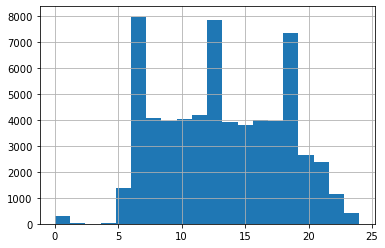

In [31]:
data['DepTime_Hour'].hist(bins=20)

<AxesSubplot:>

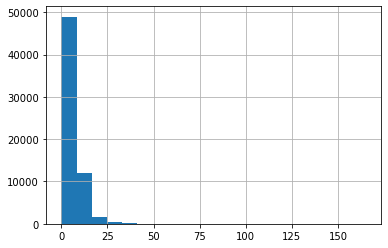

In [32]:
data['TaxiIn'].hist(bins=20)

<AxesSubplot:>

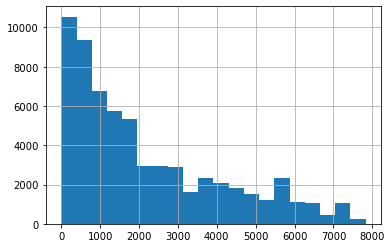

In [33]:
data['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

`Данные распределены неравномерно, кроме того, тяжело сравнивать их друг с другом: где-то максимум 8000, а где-то 50000. Вероятно, масштабирование нормирует и отцентрирует данные и всё исправит.`

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

`Забавно, что категорийные данные в таблице на самом деле строковые`

In [34]:
data.select_dtypes('object').head() # к сожалению, я проверил это это после двух часов страданий с 'categorial'

,UniqueCarrier,Origin,Dest
0,WN,MDW,CLE
1,XE,IAH,AVL
2,WN,MDW,TPA
3,OO,SLC,FCA
4,WN,LAS,AUS


In [35]:
from sklearn.preprocessing import StandardScaler

def transform_data(data):
    num = data.select_dtypes('number')
    ind = num.index
    cols = num.columns
    cat = data.select_dtypes('object')
    num.fillna(0, inplace=True)
    cat.fillna('nan', inplace=True)
    
    scaler = StandardScaler()
    num = pd.DataFrame(scaler.fit_transform(num), index=ind, columns=cols)
    
    cat = pd.get_dummies(cat)
    
    return pd.concat([num, cat], axis=1)
    
    
#B = pd.Series(['a', 'c', 'b', np.nan, 'c', 'b'], dtype="object")
#B.cat.add_categories('nan').fillna('nan')
#pd.get_dummies(B)
#df = pd.DataFrame({'a': [100000, 2] * 3,
#                   'b': B,
#                   'c': [1.0, np.nan] * 3})
#transform_data(df)

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [36]:
data_new = transform_data(data)
data_new

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
0,-0.118281,0.256485,-0.462767,-0.991600,-0.988979,-0.916826,-0.849307,-0.744130,-0.786908,-0.741204,...,0,0,0,0,0,0,0,0,0,0
1,-0.118281,-1.332050,-0.462767,0.106546,-0.040552,0.127377,0.064301,0.183961,-0.582387,-0.389769,...,0,0,0,0,0,0,0,0,0,0
2,0.467662,-1.445517,1.541454,-0.207284,0.157627,0.370547,0.314806,0.471018,-0.582387,-0.653345,...,0,0,0,0,0,0,0,0,0,0
3,-1.583137,0.823819,-0.462767,0.836931,-0.351976,-0.258835,-0.363032,-0.347886,-0.582387,0.225242,...,0,0,0,0,0,0,0,0,0,0
4,-0.411252,-1.332050,1.541454,-0.910960,0.299183,0.442068,0.476898,0.634799,-0.582387,-0.741204,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,-1.583137,1.164220,1.040399,1.564234,-0.238731,-0.230227,-0.274618,-0.120706,1.053782,-0.301910,...,0,0,0,0,0,0,0,0,0,0
69995,-0.411252,-0.424316,-1.464878,-0.708075,0.016071,-0.001361,-0.259882,-0.217566,3.098994,0.313101,...,0,0,0,0,0,0,0,0,0,0
69996,-0.411252,-0.537783,1.541454,2.047563,-1.130535,-1.145693,-1.085076,-1.043514,-0.582387,-0.301910,...,0,0,0,0,0,0,0,0,0,0
69998,-1.290166,0.256485,-1.464878,-0.786661,1.516567,1.286013,1.302092,1.208912,2.689951,0.488818,...,0,0,0,0,0,0,0,0,0,0


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_new, target, test_size=0.3, random_state=42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

sub_X_train, sub_y_train = X_train[:1000], y_train[:1000]

reg = LinearRegression().fit(sub_X_train, sub_y_train)

print('Для подвыборки:      ', mean_squared_error(sub_y_train, reg.predict(sub_X_train)), reg.score(sub_X_train, sub_y_train))
print('Для тестовой выборки:', mean_squared_error(y_test, reg.predict(X_test)), reg.score(X_test, y_test))

Для подвыборки:       563.7709862852097 0.4680485769739231
Для тестовой выборки: 1.807826912358504e+24 -1.351475560655321e+21


`И на тестовой, и на тренировочной выборках score оставляет желать лучшего. Коэфициенты w я посмотрел, но там мало интересного – мне показалось, что они в большинстве либо ноль, либо что-нибудь, умноженное на $10^{12}$`

`Возможно, некоторые коэффициенты пока слишном велики`

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [39]:
# не знаю, зачем тут это окошко, наверное, для импорта регрессий
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [49]:
# Your code here
ridge = Ridge().fit(sub_X_train, sub_y_train)
lasso = Lasso().fit(sub_X_train, sub_y_train)

len(np.where(ridge.coef_ < 1)[0]), len(np.where(lasso.coef_ < 1)[0])

(519, 631)

`Вот сейчас коэффициенты меньше. Взглянем на ненулевые:`

In [50]:
len(np.where((ridge.coef_ < 1) & (ridge.coef_ != 0))[0]), len(np.where((lasso.coef_ < 1) & (lasso.coef_ != 0))[0])

(239, 5)

In [42]:
import matplotlib.pyplot as plt

D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.787e+05, tolerance: 1.060e+02
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.364e+05, tolerance: 1.060e+02
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.266e+04, tolerance: 1.060e+02
  model = cd_fast.enet_coo

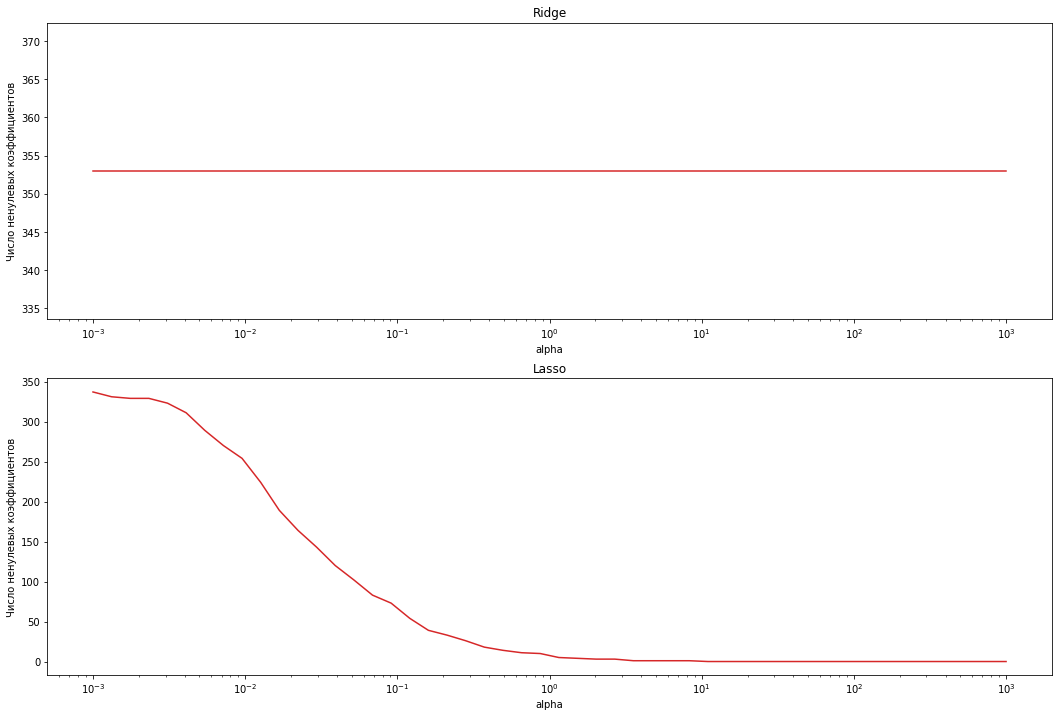

In [77]:
fig, ax = plt.subplots(2, 1, figsize=(18, 12))

Ox = np.logspace(-3, 3)
Oy_ridge, Oy_lasso = [], []
for i in Ox:
    ridge = Ridge(alpha=i).fit(sub_X_train, sub_y_train)
    lasso = Lasso(alpha=i).fit(sub_X_train, sub_y_train)
    Oy_ridge.append(len(np.where(ridge.coef_ != 0)[0]))
    Oy_lasso.append(len(np.where(lasso.coef_ != 0)[0]))

ax[0].set_xscale('log')
ax[0].set_title('Ridge')
ax[0].set_ylabel('Число ненулевых коэффициентов')
ax[0].set_xlabel('alpha')
ax[1].set_xscale('log')
ax[1].set_title('Lasso')
ax[1].set_ylabel('Число ненулевых коэффициентов')
ax[1].set_xlabel('alpha')
ax[0].plot(Ox, Oy_ridge, color='tab:red')
ax[1].plot(Ox, Oy_lasso, color='tab:red')

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [66]:
from sklearn.metrics import mean_absolute_error

In [74]:
RMSE = mean_squared_error(y_test, ridge.predict(X_test), squared=False)
MAE = mean_absolute_error(y_test, ridge.predict(X_test))
Rsquared = ridge.score(X_test, y_test)
print('RMSE = ', RMSE, '\nMAE =', MAE, '\nR^2 =', Rsquared)

RMSE =  35.803973717084986 
MAE = 18.695695975397456 
R^2 = 0.0416728137122061


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [120]:
from sklearn.model_selection import GridSearchCV

Лучшее значение alpha: 59.636233165946365 для neg_root_mean_squared_error 
Лучшая метрика: -30.20014744514009

Метрики для теста: 
RMSE =  35.803973717084986 
MAE = 18.695695975397456 
R^2 = 0.0416728137122061 


Лучшее значение alpha: 79.06043210907701 для neg_mean_absolute_error 
Лучшая метрика: -17.69716332706555

Метрики для теста: 
RMSE =  35.803973717084986 
MAE = 18.695695975397456 
R^2 = 0.0416728137122061 


Лучшее значение alpha: 59.636233165946365 для r2 
Лучшая метрика: 0.08376999650980262

Метрики для теста: 
RMSE =  35.803973717084986 
MAE = 18.695695975397456 
R^2 = 0.0416728137122061 




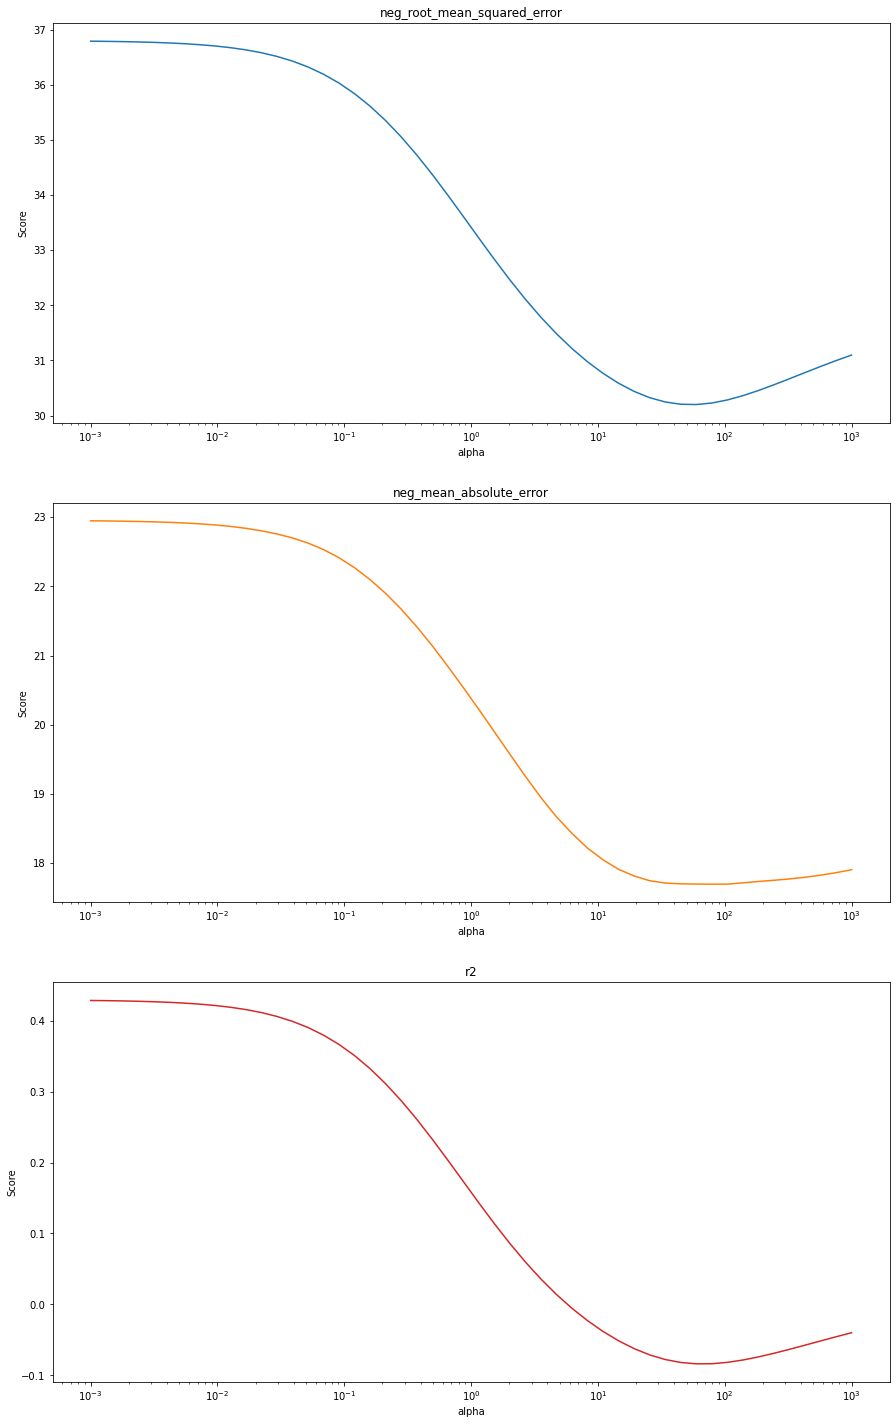

In [156]:
parameters = {'alpha': Ox}
scorings = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2']
fig, ax = plt.subplots(3, 1, figsize=(15,25))
colors = ['tab:blue', 'tab:orange', 'tab:red']

for i in range(3):
    scoring = scorings[i]
    ridge_grid = GridSearchCV(Ridge(), parameters, scoring=scoring)
    ridge_grid.fit(sub_X_train, sub_y_train)
    
    RMSE = mean_squared_error(y_test, ridge.predict(X_test), squared=False)
    MAE = mean_absolute_error(y_test, ridge.predict(X_test))
    Rsquared = ridge.score(X_test, y_test)
    
    print('Лучшее значение alpha:', ridge_grid.best_params_['alpha'], 'для', scoring, \
         '\nЛучшая метрика:', ridge_grid.best_score_, end='\n\n')
    print('Метрики для тестовой выборки:', '\nRMSE = ', RMSE, '\nMAE =', MAE, '\nR^2 =', Rsquared, '\n\n')
    
    ax[i].plot(Ox, -ridge_grid.cv_results_['mean_test_score'], color=colors[i])
    ax[i].set_title(scorings[i])
    ax[i].set_ylabel('Score')
    ax[i].set_xlabel('alpha')
    ax[i].set_xscale('log')

`Все метрики изменились не то, чтобы очень заметно`

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

Text(0.5, 1.0, 'Ошибки')

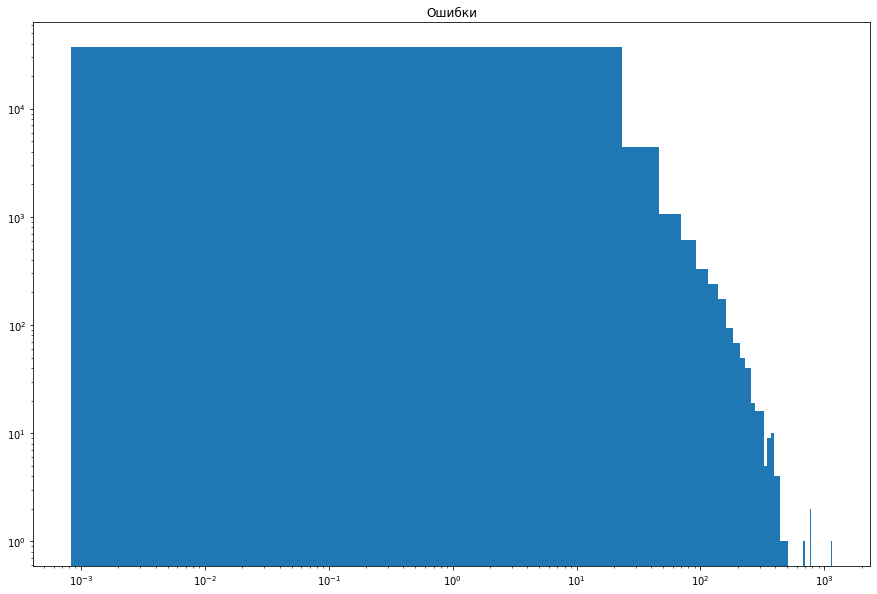

In [174]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(ridge, X_train, y_train)
plt.figure(figsize=(15,10))
plt.hist(abs(pred - y_train), bins=50)
plt.xscale('log')
plt.yscale('log')
plt.title('Ошибки')

`В основном ошибки малы`